# Individual Analysis of DAP -Project of Amrutha Varsha Venkatesh

# Student Number: x21168580

# Importing libraries

In [21]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import pymongo
%matplotlib inline
#installing pymongo
pip install pymongo


In [22]:
#reading the file into the variable df
PATH = "E:\DAP Dataset\MoviesOnStreamingPlatforms.csv"
df = pd.read_csv(PATH)

## Loading Data set to Mongo DB and Pre Processing

In [25]:
client = pymongo.MongoClient("mongodb://localhost:27107")

In [26]:
df = pd.read_csv("E:\DAP Dataset\MoviesOnStreamingPlatforms.csv")

In [27]:
df.head()

,ID,Title,Year,Age,RottenTomatoes,Netflix,Hulu,Prime Video,Disneyplus
0,1,The Irishman,2019,18+,98/100,1,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0


In [28]:
df.tail()

,ID,Title,Year,Age,RottenTomatoes,Netflix,Hulu,Prime Video,Disneyplus
9509,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1
9510,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1
9511,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1
9512,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1
9513,9515,Women of Impact: Changing the World,2019,7+,10/100,0,0,0,1


In [29]:
data=df.to_dict(orient="records")

In [30]:
data

[{'ID': 1,
  'Title': 'The Irishman',
  'Year': 2019,
  'Age': '18+',
  'RottenTomatoes': '98/100',
  'Netflix': 1,
  'Hulu': 0,
  'Prime Video': 0,
  'Disneyplus': 0},
 {'ID': 2,
  'Title': 'Dangal',
  'Year': 2016,
  'Age': '7+',
  'RottenTomatoes': '97/100',
  'Netflix': 1,
  'Hulu': 0,
  'Prime Video': 0,
  'Disneyplus': 0},
 {'ID': 3,
  'Title': 'David Attenborough: A Life on Our Planet',
  'Year': 2020,
  'Age': '7+',
  'RottenTomatoes': '95/100',
  'Netflix': 1,
  'Hulu': 0,
  'Prime Video': 0,
  'Disneyplus': 0},
 {'ID': 4,
  'Title': 'Lagaan: Once Upon a Time in India',
  'Year': 2001,
  'Age': '7+',
  'RottenTomatoes': '94/100',
  'Netflix': 1,
  'Hulu': 0,
  'Prime Video': 0,
  'Disneyplus': 0},
 {'ID': 5,
  'Title': 'Roma',
  'Year': 2018,
  'Age': '18+',
  'RottenTomatoes': '94/100',
  'Netflix': 1,
  'Hulu': 0,
  'Prime Video': 0,
  'Disneyplus': 0},
 {'ID': 6,
  'Title': "To All the Boys I've Loved Before",
  'Year': 2018,
  'Age': '13+',
  'RottenTomatoes': '94/100',
  

In [33]:
db = client["Movies"]

In [34]:
print(db)

Database(MongoClient(host=['localhost:27107'], document_class=dict, tz_aware=False, connect=True), 'Movies')


In [17]:
db.set.insert_many(data)

ServerSelectionTimeoutError: localhost:27107: [WinError 10061] No connection could be made because the target machine actively refused it, Timeout: 30s, Topology Description: <TopologyDescription id: 6266bfcb47dba032480ccfca, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27107) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27107: [WinError 10061] No connection could be made because the target machine actively refused it')>]>

## EDA for Netflix Data Set

In [36]:
#shape attribute is used to provide the number of rows and columns of the dataset.
df.shape

(9514, 9)

In [37]:
#describe is used to provide the details such as mean, frequency and percentile etc
df.describe(include='all')

,ID,Title,Year,Age,RottenTomatoes,Netflix,Hulu,Prime Video,Disneyplus
count,9514.000000,9514,9514.000000,5338,9507,9514.000000,9514.000000,9514.000000,9514.00000
unique,NaN,9514,NaN,5,85,NaN,NaN,NaN,NaN
top,NaN,The Irishman,NaN,18+,44/100,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,2276,310,NaN,NaN,NaN,NaN
mean,4757.741854,NaN,2007.422325,NaN,NaN,0.388375,0.110048,0.432205,0.09691
std,2746.917186,NaN,19.131371,NaN,NaN,0.487406,0.312966,0.495409,0.29585
min,1.000000,NaN,1914.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000
25%,2379.250000,NaN,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000
50%,4757.500000,NaN,2015.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000
75%,7135.750000,NaN,2018.000000,NaN,NaN,1.000000,0.000000,1.000000,0.00000


In [38]:
#used to return the number of values missing in the dataset.
df.isnull().sum()

ID                   0
Title                0
Year                 0
Age               4176
RottenTomatoes       7
Netflix              0
Hulu                 0
Prime Video          0
Disneyplus           0
dtype: int64

In [39]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [40]:
df.isnull().sum()

ID                0
Title             0
Year              0
Age               0
RottenTomatoes    7
Netflix           0
Hulu              0
Prime Video       0
Disneyplus        0
dtype: int64

# # Inputting and getting Data to /from PostGreSQL

In [35]:
import psycopg2
hostname = 'localhost'
database = 'postgres'
username = 'postgres'
password = 'Amvar'
port_id  = 5432

conn = psycopg2.connect(database="postgres",user='postgres', password='amvar', host='127.0.0.1', port='5432')

conn.autocommit = True
cursor = conn.cursor()
print(cursor)

sql = '''CREATE TABLE IF NOT EXISTS MOVIES2(Id int Primary key,
                             Title char(500),
                             Year int,
                             Age varchar(20),
                             RottenTomatoes varchar(20),
                             Netflix int,
                             Hulu int,
                             PrimeVideo int,
                             DisneyPlus int);'''

cursor.execute(sql)

sql2 = '''COPY Movies2(id,title,year,age,RottenTomatoes,Netflix,Hulu,PrimeVideo,DisneyPlus )
FROM 'E:\DAP Dataset\MoviesOnStreamingPlatforms.csv'
DELIMITER ','
CSV HEADER;'''


sql3 = '''select * from Movies2;'''
cursor.execute(sql3)
for i in cursor.fetchall():
    print(i)
cursor.execute(sql2)
conn.commit()
conn.close()


<cursor object at 0x0000021A79434200; closed: 0>
(1, 'The Irishman                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ', 2019, '18+', '98/100', 1, 0, 0, 0)
(2, 'Dangal                                                                                                                                                                                                                                                                                                                                                                                                             

(1200, 'Into the Grizzly Maze                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ', 2015, '18+', '60/100', 1, 0, 0, 0)
(1201, 'The Vanished                                                                                                                                                                                                                                                                                                                                                                                                                                                  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



UniqueViolation: duplicate key value violates unique constraint "movies2_pkey"
DETAIL:  Key (id)=(1) already exists.
CONTEXT:  COPY movies2, line 2


# Visualizations 

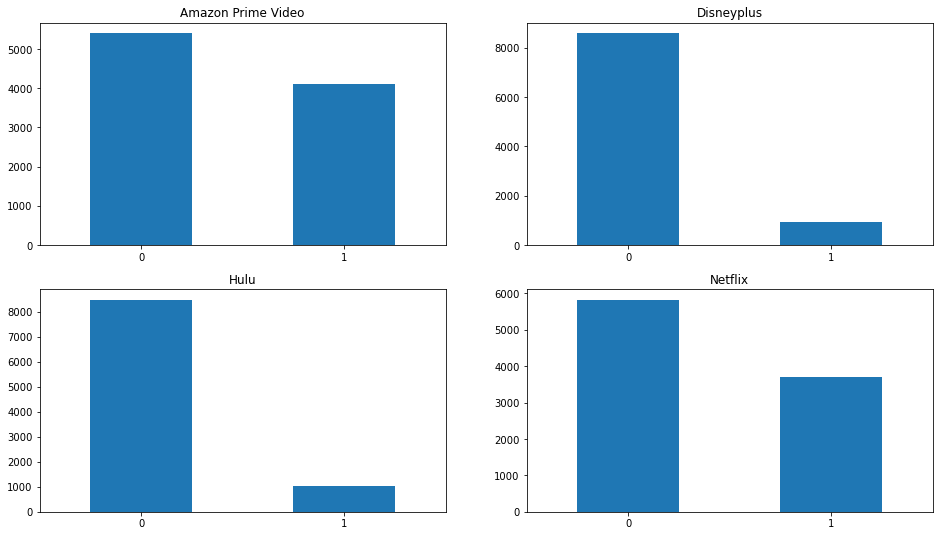

In [41]:
plt.subplot(221)
df['Prime Video'].value_counts().plot(kind='bar', title='Amazon Prime Video', figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
df['Disneyplus'].value_counts().plot(kind='bar', title='Disneyplus')
plt.xticks(rotation=0)
plt.subplot(223)
df['Hulu'].value_counts().plot(kind='bar', title='Hulu')
plt.xticks(rotation=0)
plt.subplot(224)
df['Netflix'].value_counts().plot(kind='bar', title='Netflix')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

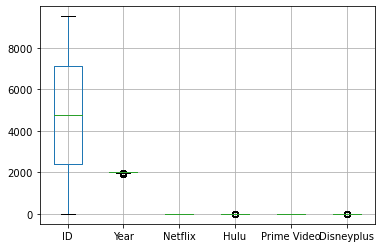

In [46]:
df.boxplot()

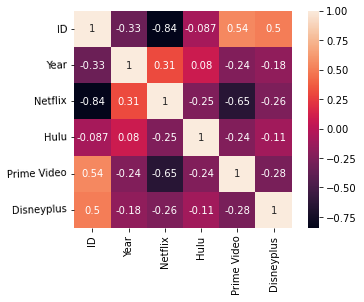

In [42]:
corr=df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=2)
plt.show()

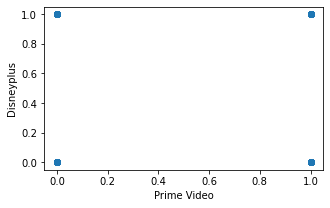

In [43]:
#The subplots() function takes three arguments that describes the layout of the figure.The layout is organized in rows and columns
fig, ax=plt.subplots(figsize=(5,3))
ax.scatter(df["Prime Video"], df["Disneyplus"])
ax.set_xlabel("Prime Video")
ax.set_ylabel("Disneyplus")
plt.show() 

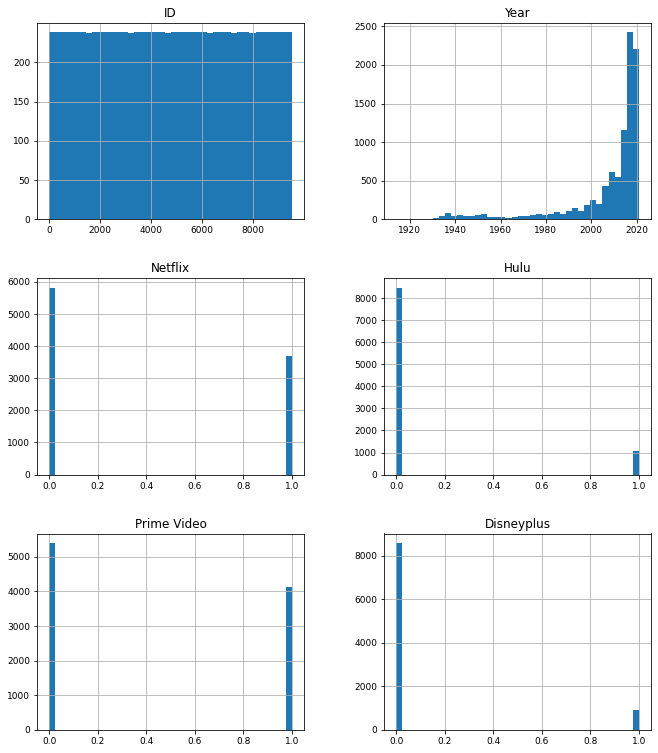

In [44]:
#this plots a histogram with width as 10 and height as 12.bins represents the bars of histogram.bins can be changed as per our wish
df.hist(figsize=(11, 13), bins=40, xlabelsize=9, ylabelsize=9); 

C:\Users\Amrutha Varsha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Amrutha Varsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


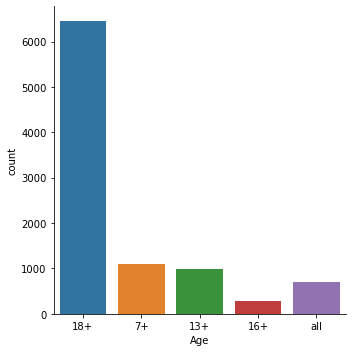

In [45]:
#factorplot is used to represent different types of categorical plot
sns.factorplot("Age",data=df,kind="count")